# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json["coord"]["lat"]
        city_lng = city_json["coord"]["lon"]
        city_max_temp = city_json["main"]["temp_max"]
        city_humidity = city_json["main"]["humidity"]
        city_clouds = city_json["clouds"]["all"]
        city_wind = city_json["wind"]["speed"]
        city_country = city_json["sys"]["country"]
        city_date = city_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp, "Humidity": city_humidity, "Cloudiness": city_clouds,"Wind Speed": city_wind,"Country": city_country,"Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nambucca
Processing Record 2 of Set 1 | roscommon
Processing Record 3 of Set 1 | pagsangahan
Processing Record 4 of Set 1 | san pedro pochutla
Processing Record 5 of Set 1 | peace river
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | jodhpur
Processing Record 8 of Set 1 | tasbuget
City not found. Skipping...
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | bardai
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | pechora
Processing Record 16 of Set 1 | camocim
Processing Record 17 of Set 1 | qui nhon
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | katsuura
Processing Record 2

Processing Record 35 of Set 4 | quepos
Processing Record 36 of Set 4 | belmonte
Processing Record 37 of Set 4 | levuka
Processing Record 38 of Set 4 | ta`u
Processing Record 39 of Set 4 | thenzawl
Processing Record 40 of Set 4 | tazovsky
Processing Record 41 of Set 4 | navrongo
Processing Record 42 of Set 4 | happy valley-goose bay
Processing Record 43 of Set 4 | haiku-pauwela
Processing Record 44 of Set 4 | tupa
Processing Record 45 of Set 4 | cockburn town
Processing Record 46 of Set 4 | albany
Processing Record 47 of Set 4 | tangalle
Processing Record 48 of Set 4 | margaret river
Processing Record 49 of Set 4 | lethbridge
Processing Record 0 of Set 5 | chiredzi
Processing Record 1 of Set 5 | dudinka
Processing Record 2 of Set 5 | inarajan village
Processing Record 3 of Set 5 | acarau
Processing Record 4 of Set 5 | remire-montjoly
Processing Record 5 of Set 5 | sidhi
Processing Record 6 of Set 5 | olinda
Processing Record 7 of Set 5 | angel r. cabada
Processing Record 8 of Set 5 | ki

Processing Record 29 of Set 8 | lazaro cardenas
Processing Record 30 of Set 8 | kaiapoi
Processing Record 31 of Set 8 | baruun-urt
Processing Record 32 of Set 8 | mersing
Processing Record 33 of Set 8 | polyarnyy
Processing Record 34 of Set 8 | hilo
Processing Record 35 of Set 8 | kapuskasing
Processing Record 36 of Set 8 | khandyga
Processing Record 37 of Set 8 | saipan
Processing Record 38 of Set 8 | bamboo flat
Processing Record 39 of Set 8 | omdurman
Processing Record 40 of Set 8 | mossel bay
Processing Record 41 of Set 8 | luanda
Processing Record 42 of Set 8 | weno
Processing Record 43 of Set 8 | tanushimarumachi-toyoki
Processing Record 44 of Set 8 | la tuque
Processing Record 45 of Set 8 | swakopmund
Processing Record 46 of Set 8 | eydhafushi
Processing Record 47 of Set 8 | maracaibo
Processing Record 48 of Set 8 | limavady
Processing Record 49 of Set 8 | penaranda de bracamonte
Processing Record 0 of Set 9 | murghob
Processing Record 1 of Set 9 | kone
Processing Record 2 of Se

Processing Record 19 of Set 12 | saeby
Processing Record 20 of Set 12 | ramadi
Processing Record 21 of Set 12 | tindouf
Processing Record 22 of Set 12 | bereznik
Processing Record 23 of Set 12 | kununurra
Processing Record 24 of Set 12 | castillos
Processing Record 25 of Set 12 | fort st. john
Processing Record 26 of Set 12 | dalnegorsk
Processing Record 27 of Set 12 | igarka
Processing Record 28 of Set 12 | meadow lakes
Processing Record 29 of Set 12 | azemmour
Processing Record 30 of Set 12 | west bay
Processing Record 31 of Set 12 | tarko-sale
Processing Record 32 of Set 12 | beira
Processing Record 33 of Set 12 | satka
Processing Record 34 of Set 12 | callao
Processing Record 35 of Set 12 | gondar
Processing Record 36 of Set 12 | aquia harbour
Processing Record 37 of Set 12 | xiaoshi
Processing Record 38 of Set 12 | betio village
Processing Record 39 of Set 12 | lima
Processing Record 40 of Set 12 | es castell
Processing Record 41 of Set 12 | ust-tsilma
Processing Record 42 of Set 

In [34]:
# Convert the cities weather data into a Pandas DataFrame
city_weather_dict = (city_data) 

city_weather_df = pd.DataFrame(city_weather_dict)

# Show Record Count
city_weather_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [35]:
# Display sample data
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nambucca,-30.6333,152.9833,70.83,86,76,3.24,AU,1706643164
1,roscommon,53.6333,-8.1833,41.11,76,100,11.54,IE,1706643164
2,pagsangahan,13.2158,122.5431,76.50,84,92,11.68,PH,1706643165
3,san pedro pochutla,15.7333,-96.4667,87.51,45,0,8.50,MX,1706643166
4,peace river,56.2501,-117.2860,44.91,61,75,26.46,CA,1706643166


In [36]:
# Export the City_Data into a csv
city_weather_df.to_csv("output_data/cities.csv", index_label="City")

In [37]:
# Read saved data
city_weather_df = pd.read_csv("output_data/cities.csv", index_col="City")

# Display sample data
city_weather_df.head()

,City.1,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,,
0,nambucca,-30.6333,152.9833,70.83,86,76,3.24,AU,1706643164
1,roscommon,53.6333,-8.1833,41.11,76,100,11.54,IE,1706643164
2,pagsangahan,13.2158,122.5431,76.50,84,92,11.68,PH,1706643165
3,san pedro pochutla,15.7333,-96.4667,87.51,45,0,8.50,MX,1706643166
4,peace river,56.2501,-117.2860,44.91,61,75,26.46,CA,1706643166


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

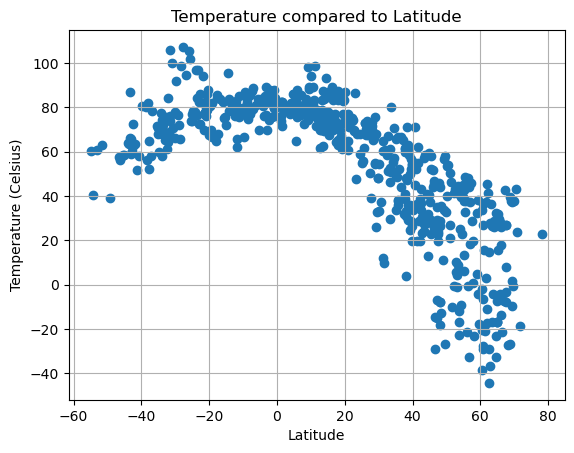

In [38]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature compared to Latitude")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

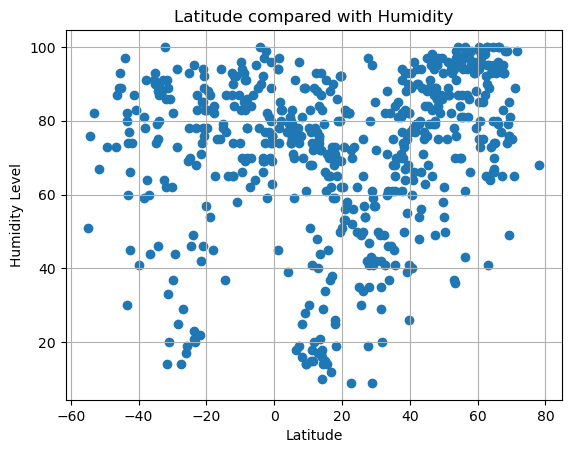

In [39]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude compared with Humidity")
plt.ylabel("Humidity Level")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

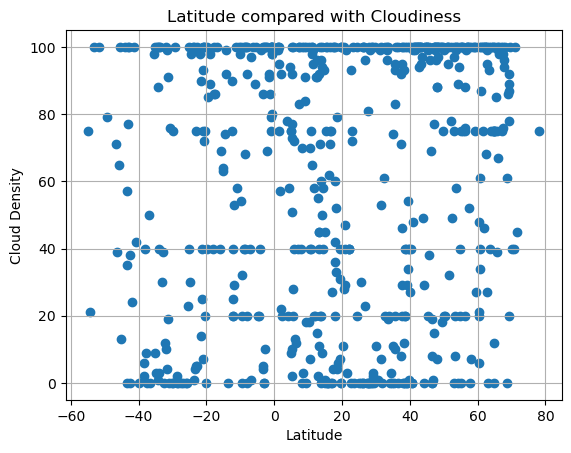

In [40]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude compared with Cloudiness")
plt.ylabel("Cloud Density")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

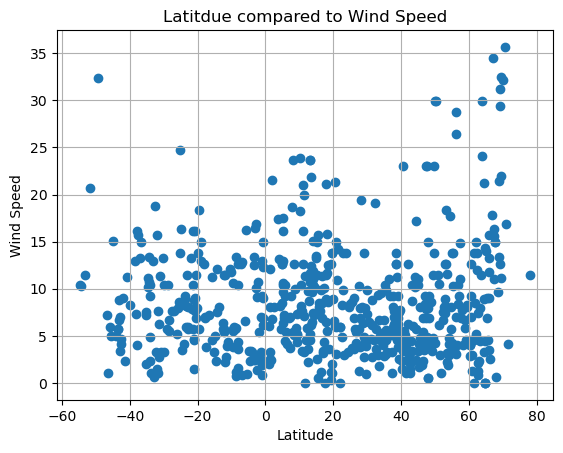

In [41]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitdue compared to Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

NameError: name 'x_values' is not defined

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_weather_df.loc[city_weather_df["Lat"] >= 0]
northern_hemi_df = pd.DataFrame(northern_hemi)

# Display sample data
northern_hemi_df.head()

,City.1,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,,
1,roscommon,53.6333,-8.1833,41.11,76,100,11.54,IE,1706643164
2,pagsangahan,13.2158,122.5431,76.50,84,92,11.68,PH,1706643165
3,san pedro pochutla,15.7333,-96.4667,87.51,45,0,8.50,MX,1706643166
4,peace river,56.2501,-117.2860,44.91,61,75,26.46,CA,1706643166
6,jodhpur,26.2867,73.0300,67.69,34,100,3.60,IN,1706643167


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_weather_df.loc[city_weather_df["Lat"] < 0]
southern_hemi_df = pd.DataFrame(southern_hemi)

# Display sample data
southern_hemi_df.head()

,City.1,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,,
0,nambucca,-30.6333,152.9833,70.83,86,76,3.24,AU,1706643164
5,adamstown,-25.0660,-130.1015,73.98,93,100,24.76,PN,1706643167
7,puerto natales,-51.7236,-72.4875,63.05,67,100,20.71,CL,1706643168
8,carnarvon,-24.8667,113.6333,78.22,70,30,16.35,AU,1706643169
10,puerto ayora,-0.7393,-90.3518,87.76,76,80,12.26,EC,1706643170


###  Temperature vs. Latitude Linear Regression Plot

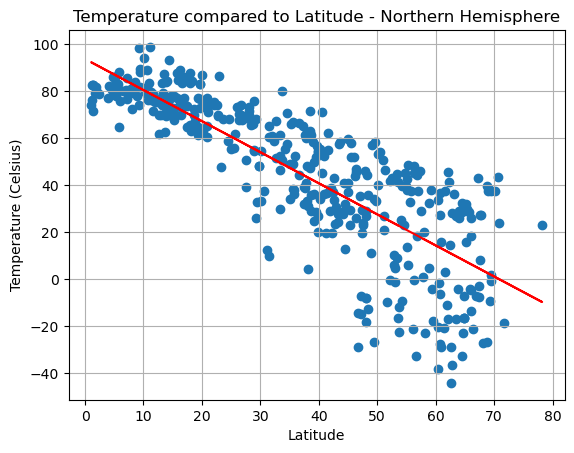

In [46]:
# Linear regression on Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stedrr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_val, regress_values, "r-")
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o")

plt.title("Temperature compared to Latitude - Northern Hemisphere")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

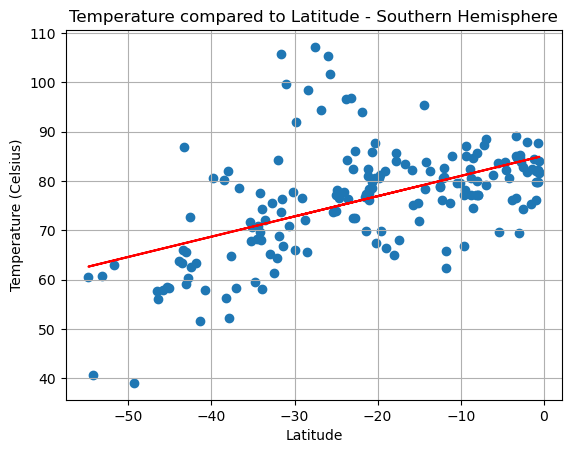

In [47]:
# Linear regression on Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stedrr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_val, regress_values, "r-")
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o")

plt.title("Temperature compared to Latitude - Southern Hemisphere")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

**Discussion about the linear relationship:** These two graphs are showing that is a positive linear relationship with the two variables being compared. That is that the further away from the equator you are (0 degrees) the lower, or cooler, the max temperature can be. There is a stronger correlation with max temperature in the northern hempisphere then there is in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

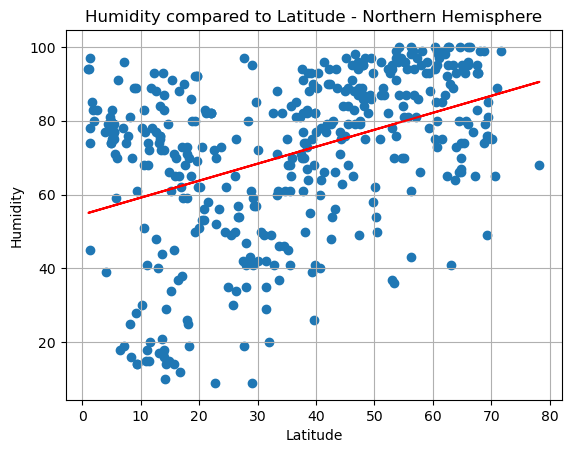

In [48]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stedrr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_val, regress_values, "r-")
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o")

plt.title("Humidity compared to Latitude - Northern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

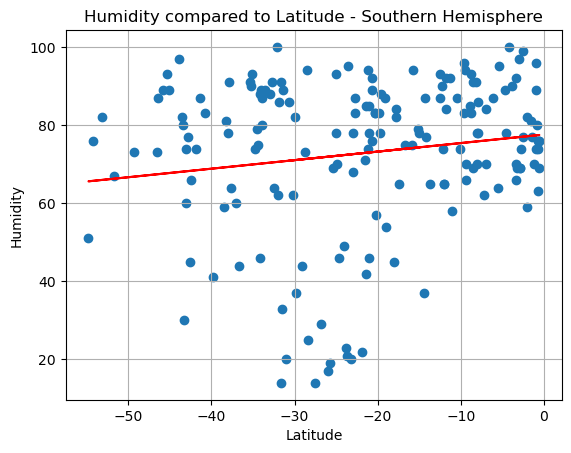

In [49]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stedrr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_val, regress_values, "r-")
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o")

plt.title("Humidity compared to Latitude - Southern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

**Discussion about the linear relationship:** These two graphs show a similar correlation with each other, but the data points are too spread out to be significant enough for a conclusive answer. 

### Cloudiness vs. Latitude Linear Regression Plot

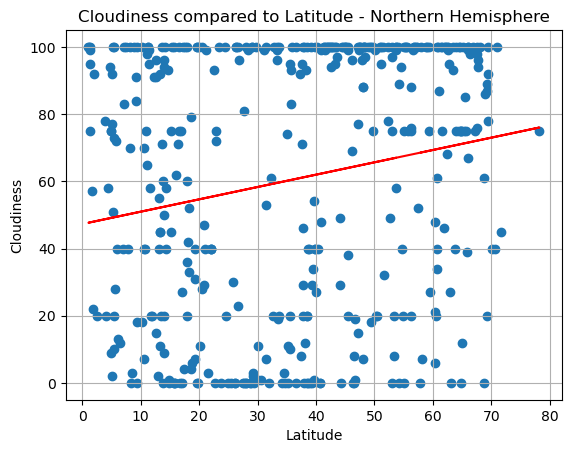

In [50]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stedrr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_val, regress_values, "r-")
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o")

plt.title("Cloudiness compared to Latitude - Northern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

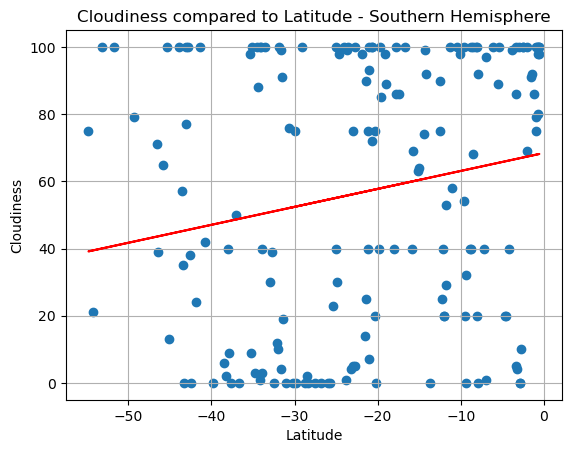

In [51]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stedrr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_val, regress_values, "r-")
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o")

plt.title("Cloudiness compared to Latitude - Southern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

**Discussion about the linear relationship:** These two graphs share a very similar linear relationship, as well as spread of data points, but because of the spread of data points the two graphs do not have a lot of significance with cloudiness. Unless, theoretically, we expand the data and the linear regression stays the same, then we might be able to conclude that the further north we go the more cloudy it can get.

### Wind Speed vs. Latitude Linear Regression Plot

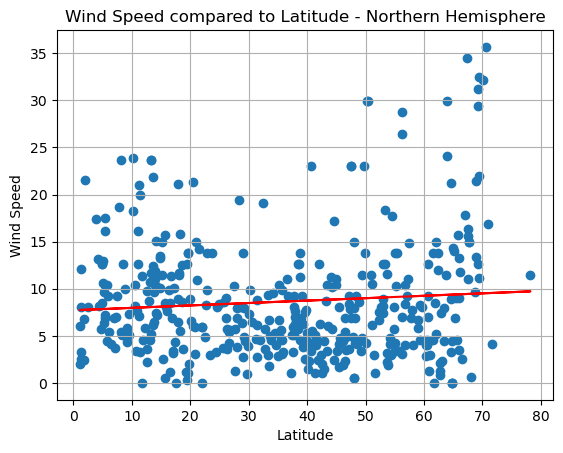

In [52]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stedrr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_val, regress_values, "r-")
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o")

plt.title("Wind Speed compared to Latitude - Northern Hemisphere")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

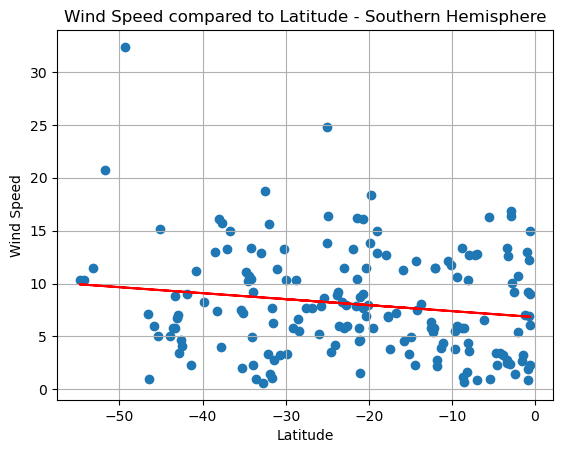

In [53]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stedrr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_val, regress_values, "r-")
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o")

plt.title("Wind Speed compared to Latitude - Southern Hemisphere")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

**Discussion about the linear relationship:** The linear relationship between these two graphs show a strong simliarity with distance from the equator and gradually stronger wind. The southern hemisphere data points are more consistent than the northern hemisphere showing lower outliers, where in the northern hemisphere we see larger outliers the further north we go.